## Project: Heart Disease. Decision tree classifier

Dataset from Machine learning repository
__[“Heart Disease Data Set”](http://archive.ics.uci.edu/ml/datasets/Heart+Disease)__.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### Data Set Information

- age: age in years 
- sex: sex (1 = male; 0 = female) 
- cp: chest pain type 
-- Value 1: typical angina 
-- Value 2: atypical angina 
-- Value 3: non-anginal pain 
-- Value 4: asymptomatic 
- trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
- chol: serum cholestoral in mg/dl 
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
- restecg: resting electrocardiographic results 
-- Value 0: normal 
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
- thalach: maximum heart rate achieved 
- exang: exercise induced angina (1 = yes; 0 = no) 
- oldpeak: ST depression induced by exercise relative to rest 
- place: place of registration disease
-  num: diagnosis of heart disease (angiographic disease status) 
-- Value 0: < 50% diameter narrowing 
-- Value 1: > 50% diameter narrowing 
(in any major vessel: attributes 59 through 68 are vessels) 

### Data exploration. Basic descriptive statistics

In [2]:
df= pd.read_csv("data/HeartDiseaseData.csv")
df.head()

,Unnamed: 0,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,1,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
1,2,2,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
2,3,3,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
3,4,4,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
4,5,5,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary


In [3]:
df.dtypes

Unnamed: 0      int64
ID              int64
Age             int64
Sex            object
cp             object
trestbps      float64
chol          float64
fbs            object
restecg        object
thalach       float64
exang          object
oldpeak       float64
num             int64
Place          object
dtype: object

In [4]:
df = df.drop(columns=["Unnamed: 0", "Place", "ID"])
df = df.dropna(how='any')

In [5]:
df = df.rename(str.lower, axis='columns')
df.rename(columns={'num': 'diagnosis'}, inplace=True)
# df.rename(columns={'cp':'chest_pain_type', 'chol': 'cholestoral', 
#                    'thalach': 'maximum_heart_rate_achieved',
#                   'num':'diagnosis', 'oldpeak':'ST_depression',
#                   'fbs': 'fasting_blood_sugar',
#                   'exang': 'exercise'}, inplace=True)

In [6]:
df = pd.get_dummies(df, prefix='sex', columns=['sex'], drop_first = True)

In [7]:
df['restecg'] = df.restecg.replace(regex = 'having ST-T wave abnormality \(T wave inversions and/or ST elevation or depression of > 0.05 mV', value=1)
df['restecg'] = df.restecg.replace(regex = 'normal', value=0)
df['restecg'] = df.restecg.replace(regex = 'showing probable or definite left ventricular hypertrophy by Estes criteria', value=2)
df.restecg.value_counts()

0    248
1     76
2     18
Name: restecg, dtype: int64

In [8]:
df['fbs'] = df.fbs.astype(int)
df['exang'] = df.exang.replace(regex = 'no', value=0)
df['exang'] = df.exang.replace(regex = 'yes', value=1)

In [9]:
df.cp.value_counts()
df['cp'] = df.cp.replace(regex = 'asymptomatic', value=4)
df['cp'] = df.cp.replace(regex = 'atypical angina', value=2)
df['cp'] = df.cp.replace(regex = 'non-anginal pain', value=3)
df['cp'] = df.cp.replace(regex = 'typical angina', value=1)

In [10]:
df.dtypes

age            int64
cp             int64
trestbps     float64
chol         float64
fbs            int32
restecg        int64
thalach      float64
exang          int64
oldpeak      float64
diagnosis      int64
sex_male       uint8
dtype: object

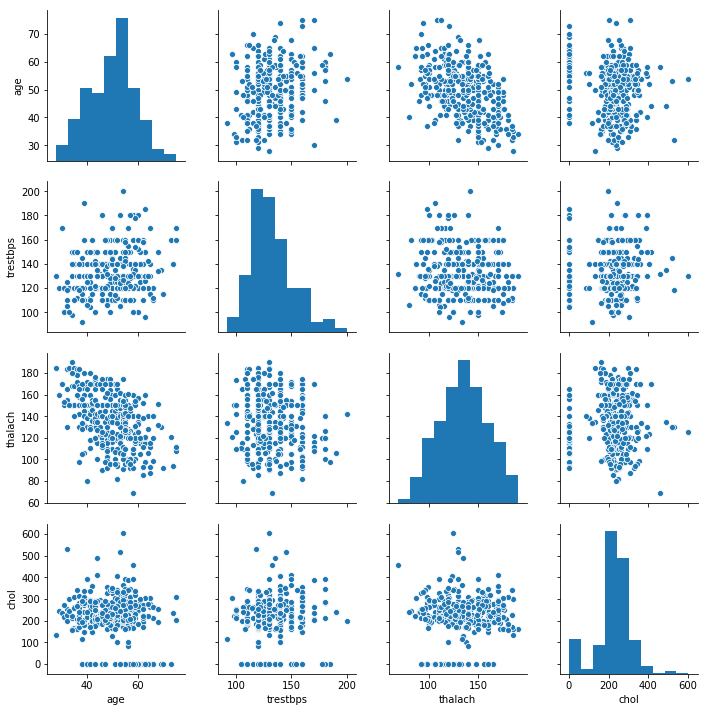

In [11]:
numeric = df[['age', 'trestbps', 'thalach', 'chol']]
sns.pairplot(numeric)


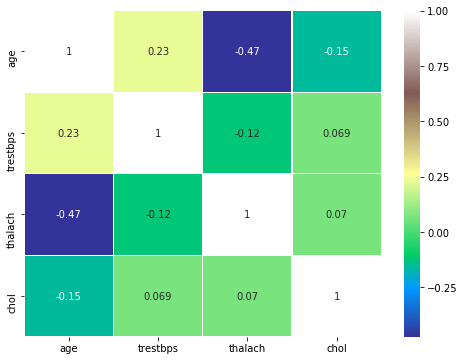

In [12]:
sns.heatmap(numeric.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

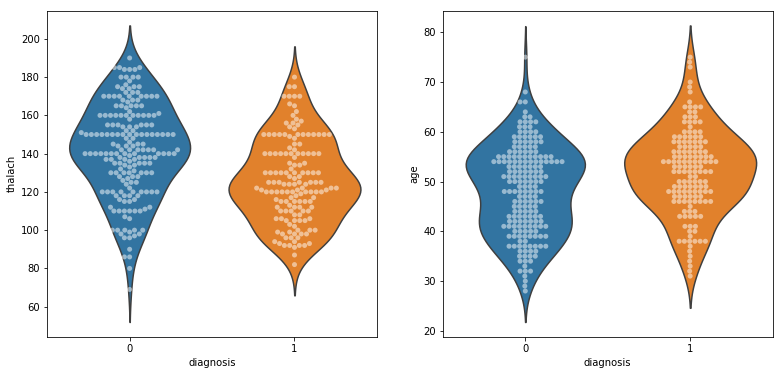

In [13]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="diagnosis", y="thalach", data=df, inner=None)
sns.swarmplot(x='diagnosis', y='thalach', data=df, color='w', alpha=0.5)
plt.subplot(122)
sns.violinplot(x="diagnosis", y="age", data=df, inner=None)
sns.swarmplot(x='diagnosis', y='age', data=df, color='w', alpha=0.5)
plt.show()

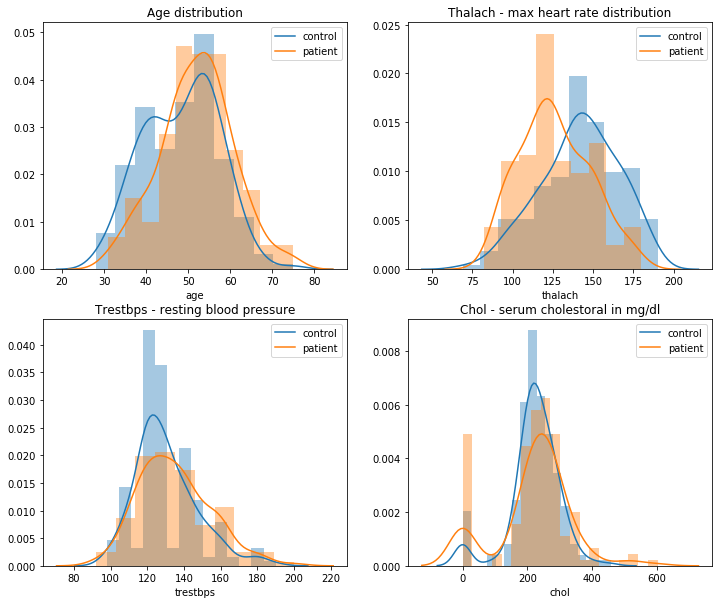

In [14]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['diagnosis']==0].age, kde_kws={"label": "control"})
sns.distplot(df[df['diagnosis']==1].age, kde_kws={"label": "patient"})
plt.title('Age distribution')
plt.subplot(222)
sns.distplot(df[df['diagnosis']==0].thalach, kde_kws={"label": "control"})
sns.distplot(df[df['diagnosis']==1].thalach, kde_kws={"label": "patient"})
plt.title('Thalach - max heart rate distribution')
plt.subplot(223)
sns.distplot(df[df['diagnosis']==0].trestbps, kde_kws={"label": "control"})
sns.distplot(df[df['diagnosis']==1].trestbps, kde_kws={"label": "patient"})
plt.title('Trestbps - resting blood pressure')
plt.subplot(224)
sns.distplot(df[df['diagnosis']==0].chol, kde_kws={"label": "control"})
sns.distplot(df[df['diagnosis']==1].chol, kde_kws={"label": "patient"})
plt.title('Chol - serum cholestoral in mg/dl')
plt.show()

## Split data for model training

In [15]:
X = df.drop('diagnosis', axis=1)
y = df.diagnosis

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Construction train decision tree to predict the target variable diagnosis

In [17]:
# Selection of tree depth
max_depth_values = range(1, 50)
classifier_score_data = pd.DataFrame()
for max_dept in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_dept)
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    train_score = clf.score(X_train, y_train)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'precision').mean()
    
    classifier_score_data = classifier_score_data \
        .append(pd.DataFrame({'test_score': [test_score], 
                              'train_score': [train_score], 
                              'max_dept': [max_dept], 
                              'mean_cross_val_score': [mean_cross_val_score]}))

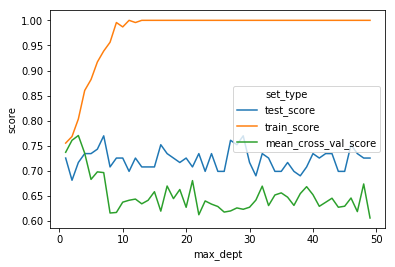

In [18]:
# Visualization of score from tree depth
classifier_score_data = pd.melt(classifier_score_data, id_vars=['max_dept'], var_name='set_type', value_name='score')
ax = sns.lineplot(x="max_dept", y="score",
                  hue="set_type", data=classifier_score_data)

**According to picture above the best tree have 4 depth**

## Model validation on test data. Comparison of classification accuracy on test and training set